In [5]:
import torch
from gamesopt.train_distributed import train, TrainConfig
from gamesopt.games import GameOptions, QuadraticGameConfig, GameType
from gamesopt.optimizer.base import OptimizerOptions, OptimizerType
from gamesopt.aggregator import AggregationOptions, AggregatorType
from gamesopt.attacks import AttackOptions, AttackType
import matplotlib.pyplot as plt
from gamesopt.games.utils import create_matrix

%matplotlib widget
%load_ext autoreload
%autoreload 1

In [14]:
n_iter = 200

n_peers = 20
n_byzan = 4

num_samples = 800
dim = 16
with_bias = True
sigma = 1e-1  # actually scales sigma
mu = 1e-2
ell = 1e2

attack_type = AttackType.ALIE
n_attacking = 9
ipm_epsilon = 1e1
rn_sigma = 1e6
alie_z = 1e2


use_bucketing = True
bucketing_s = 2
aggregator_type = AggregatorType.RFA
trimmed_mean_b = 10
krum_m = 2
clipping_tau = 102
clipping_n_iter = 1
rfa_T: int = 10
rfa_nu: int = 0.1

optimizer_type = OptimizerType.SGDARA
# optimizer_type = OptimizerType.MSGDARA
# optimizer_type = OptimizerType.SEGDARA
alpha = 0.1
lr = 1/2/ell
lr_inner = 1/2/(ell)
lr_outer = lr_inner/4
batch_size = 1
sigmaC = 100.

matrix, bias = create_matrix(dim, num_samples, mu, ell, sigma,
                             with_bias=with_bias)
true = torch.linalg.solve(matrix.mean(dim=0), -bias.mean(dim=0))
players = true + 1.

In [15]:
aggregation_options = AggregationOptions(n_peers=n_peers,
                                         n_byzan=n_byzan,
                                         aggregator_type=aggregator_type,
                                         use_bucketing=use_bucketing,
                                         bucketing_s=bucketing_s,
                                         trimmed_mean_b=trimmed_mean_b,
                                         krum_m=krum_m,
                                         clipping_tau=clipping_tau,
                                         clipping_n_iter=clipping_n_iter,
                                         rfa_T=rfa_T,
                                         rfa_nu=rfa_nu)

quadratic_game_options = QuadraticGameConfig(num_samples=num_samples,
                                             dim=dim,
                                             num_players=2,
                                             with_bias=with_bias,
                                             sigma=sigma,
                                             mu=mu,
                                             ell=ell,
                                             matrix=matrix,
                                             bias=bias,
                                             players=players,
                                             true=true)

game_options = GameOptions(GameType.QUADRATIC, quadratic_game_options)

attack_options = AttackOptions(n_peers=n_peers,
                               n_byzan=n_byzan,
                               n_attacking=n_attacking,
                               attack_type=attack_type,
                               ipm_epsilon=ipm_epsilon,
                               rn_sigma=rn_sigma,
                               alie_z=alie_z)

optimizer_options = OptimizerOptions(n_peers=n_peers,
                                     optimizer_type=optimizer_type,
                                     lr=lr,
                                     batch_size=batch_size,
                                     aggregation_options=aggregation_options,
                                     attack_options=attack_options,
                                     sigmaC=sigmaC,
                                     alpha=alpha,
                                     lr_inner=lr_inner,
                                     lr_outer=lr_outer)

config = TrainConfig(game=game_options,
                     optimizer=optimizer_options,
                     num_iter=n_iter,
                     n_peers=n_peers)
# print(config)

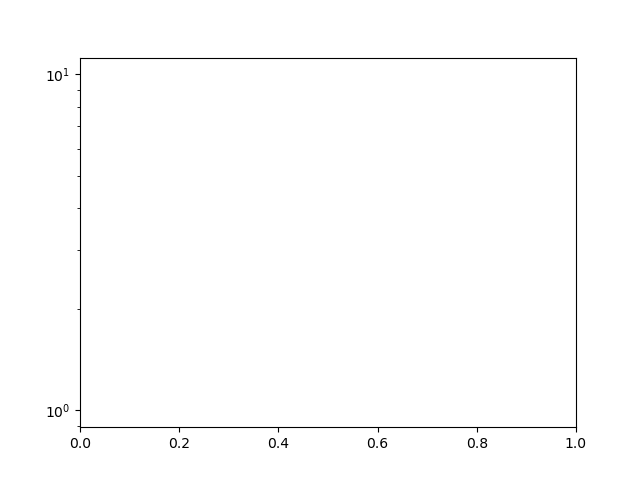

In [16]:
plt.figure()
plt.yscale('log')

In [17]:
config.optimizer.lr = 1/2/ell/15
config.num_iter = 1000
config.num_iter += 1

In [18]:
# config.game.quadratic_options.players = true + 1/dim
config.optimizer.optimizer_type = OptimizerType.SGDARA
config.optimizer.attack_options.n_attacking = n_byzan
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         marker=config.optimizer.optimizer_type.value, markevery=10,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.name,
                              config.optimizer.lr))

Trying port 7972


In [19]:
# config.game.quadratic_options.players = true + 1/dim
config.optimizer.optimizer_type = OptimizerType.MSGDARA
config.optimizer.attack_options.n_attacking = n_byzan
config.optimizer.alpha = 0.1
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         marker=config.optimizer.optimizer_type.value, markevery=10,
         label="%s lr=%.e m=%.e" % (config.optimizer.optimizer_type.name,
                                    config.optimizer.lr,
                                    config.optimizer.alpha))

Trying port 34137


In [ ]:
config.optimizer.optimizer_type = OptimizerType.SEGRA
config.optimizer.attack_options.n_attacking = n_byzan
config.optimizer.lr_inner = config.optimizer.lr
config.optimizer.lr_outer = config.optimizer.lr
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         marker=config.optimizer.optimizer_type.value, markevery=10,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.name,
                              config.optimizer.lr))

In [20]:
config.optimizer.optimizer_type = OptimizerType.RDEG
config.optimizer.attack_options.n_attacking = n_byzan
config.optimizer.lr_inner = config.optimizer.lr
config.optimizer.lr_outer = config.optimizer.lr
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         marker=config.optimizer.optimizer_type.value, markevery=10,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.name,
                              config.optimizer.lr))

Trying port 4420


In [21]:
config.optimizer.optimizer_type = OptimizerType.SGDACC
config.optimizer.attack_options.n_attacking = 1
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         marker=config.optimizer.optimizer_type.value, markevery=10,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.name,
                              config.optimizer.lr))

Trying port 25045


In [22]:
config.optimizer.optimizer_type = OptimizerType.SEGCC
config.optimizer.attack_options.n_attacking = 1
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         marker=config.optimizer.optimizer_type.value, markevery=10,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.name,
                              config.optimizer.lr))

Trying port 35941


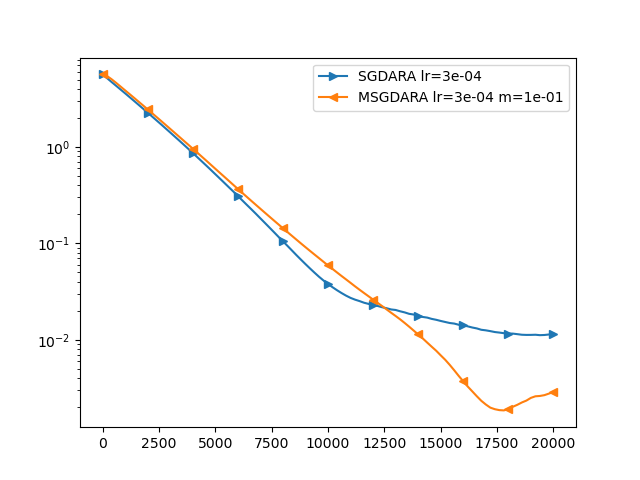

In [20]:
plt.legend()
plt.show()

In [45]:
# plt.savefig('figures/true-start-m.pdf', bbox_inches='tight')